1.Chi_sq(n) with all Xi's to be independent std normal Random Variables, i.e N~(0,0.5)

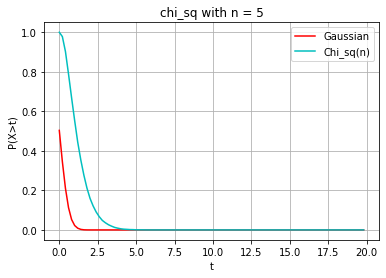

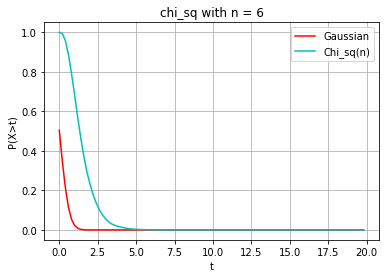

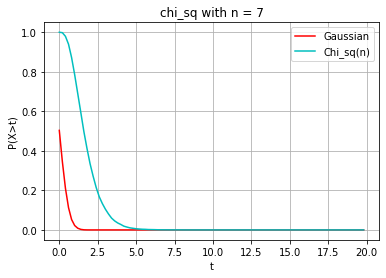

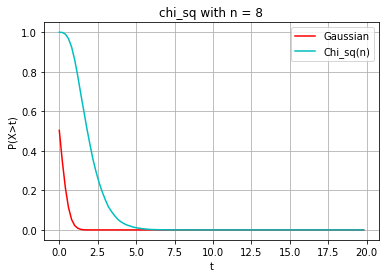

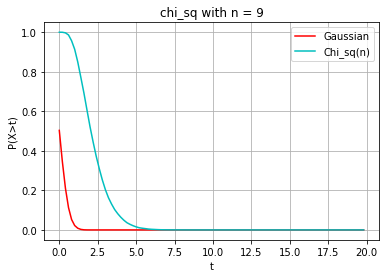

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean=0
std_dev=0.5
Xstd_n = np.random.normal(mean, std_dev, 10000)
tail_range=np.arange(0,20,0.2)

for n in range(5, 10):
  chi_sq=0
  for i in range(n):
    Xi = np.random.normal(mean, std_dev, 10000)
    chi_sq = chi_sq + np.square(Xi)
  pchi_sq_gt=[]
  pstd_gau_gt=[]
  for t in tail_range:
    pchi_sq_gt.append(len(chi_sq[chi_sq>t])/len(chi_sq))
    pstd_gau_gt.append(len(Xstd_n[Xstd_n>t])/len(Xstd_n))
  plt.xlabel('t')
  plt.ylabel('P(X>t)')
  plt.title("chi_sq with n = "+str(n))
  plt.plot(tail_range,pstd_gau_gt,c='r',label='Gaussian')
  plt.plot(tail_range,pchi_sq_gt,c='c',label='Chi_sq(n)')
  plt.legend()
  plt.grid()
  plt.show()
 
######  observation #######
#clearly from the below plots, since the tail probability of gau_rv < tail prob of chi_sq(n) , Therefore for above empirically chosen parameters chi_sq(n) doesn't follow sub gaussianity


2.a)Sub-Gaussianity check for Uniform Random Variable [-a,a]

enter 'a' value: 1
enter 'std_dev' value such that std_dev=>(2a): 3


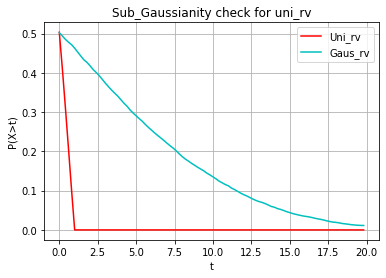

In [ ]:
a = int(input("enter 'a' value: "))
std_dev = int(input("enter 'std_dev' value such that std_dev=>(2a): "))
U_rv = np.random.uniform(-int(a),int(a),10000)
G_rv = np.random.normal(0, std_dev*std_dev, 10000)

puni_gt=[]
p_gau_gt=[]
for t in tail_range:
  puni_gt.append(len(U_rv[U_rv>t])/len(U_rv))
  p_gau_gt.append(len(G_rv[G_rv>t])/len(G_rv))
plt.title('Sub_Gaussianity check for uni_rv')
plt.xlabel('t')
plt.ylabel('P(X>t)')
plt.plot(tail_range,puni_gt,c='r',label='Uni_rv')
plt.plot(tail_range,p_gau_gt,c='c',label='Gaus_rv')
plt.legend()
plt.grid()
plt.show()

####### observation #####
## for a=1, std=3

#from the plot, the tail prob of Gaus_rv> tail prob of Unif_rv. Therefore Uniform rv follows sub gaussianity for the above choosen parameters

2.b) To check for Non Sub Gaussianity of Laplacian RV mean=0, var=2b*b ,i.e

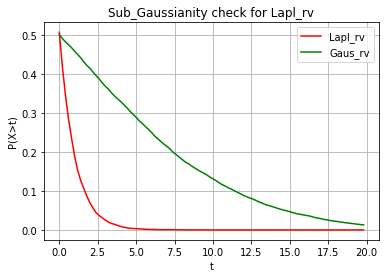

In [ ]:
lap=np.random.laplace(0, 1, 10000)
plap_gt=[]
p_gau_gt=[]
for t in tail_range:
  plap_gt.append(len(lap[lap>t])/len(lap))
  p_gau_gt.append(len(G_rv[G_rv>t])/len(G_rv))
plt.title('Sub_Gaussianity check for Lapl_rv')
plt.xlabel('t')
plt.ylabel('P(X>t)')
plt.plot(tail_range,plap_gt,c='r',label='Lapl_rv')
plt.plot(tail_range,p_gau_gt,c='g',label='Gaus_rv')
plt.legend()
plt.grid()
plt.show()

###### observation
#for b=1/sqr(2), std=3 (choose gau_var>lap_var)
# The tail prob of Gaus rv< Tail prob of Laplacian rv. Therefore Laplacian rv with above parameters is not a sub gaussian rv

3. Tightness of tail bound due to Bennetts inequality over Hoeffdings inequality and chernoff bounds 

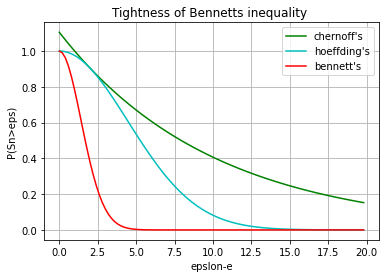

In [88]:

lamb = 0.1
n=20
M = 1
sn = 0
chernoff=[]
hoeffding=[]
bennett=[]
def truncated_normal(mean, stddev, minval, maxval):
  return np.clip(np.random.normal(mean, stddev, 1000), minval, maxval)
def phi(u):
  return (1+u)*np.log(1+u) - u
for i in range(n):
  x = truncated_normal(0, 1, -M, M)
  sn = sn + x
 
for eps in tail_range:
  prob_Xgt_c =np.exp((n*lamb*lamb/(2)) - (eps*lamb))
  chernoff.append(prob_Xgt_c)
  
  prob_Xgt_h = np.exp(-2*(eps*eps)/(4*n*M*M))
  hoeffding.append(prob_Xgt_h)

  prob_Xgt_b = np.exp(-n*np.var(sn)*phi((M*eps/(n*1)))/(M*M))
  bennett.append(prob_Xgt_b)
plt.title("Tightness of Bennetts inequality ")
plt.xlabel('epslon-e')
plt.ylabel('P(Sn>eps)')
plt.plot(tail_range, chernoff,color='g',label="chernoff's")
plt.plot(tail_range, hoeffding, color='c',label="hoeffding's")
plt.plot(tail_range, bennett, color='r',label="bennett's")
plt.legend()
plt.grid()
plt.show()

#######observation
## from the below plot, it is clear that Bennett's inequality gives tighter bound than Hoeffding's inequality , which is indeed tighter than chernoff's inequality for a choosen n=10 iid Gaussian Rvs

